# <center>Challenge 2<center>

<p>Team Name: AA Batteries
<p>Student Names: Adam Rodi, Adriean Lemoine

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import scipy as stats

## Prepare Data

In [3]:
rng = np.random.default_rng(42)
n = 100
normal_data = rng.normal(loc=10, scale=2, size=n)
uniform_data = rng.uniform(low=4, high=16, size=n)

sorted_norm = np.sort(normal_data)
sorted_unif = np.sort(uniform_data)

quantiles = [0.10, 0.25, 0.50, 0.75]
normal_quantiles = np.quantile(sorted_norm, quantiles)
uniform_quantiles = np.quantile(sorted_unif, quantiles)
quantile_labels = ['10% Quantile', '25% Quantile', '50% Quantile', '75% Quantile']
colors = ['red', 'orange', 'green', 'blue']

# Q-Q Plot

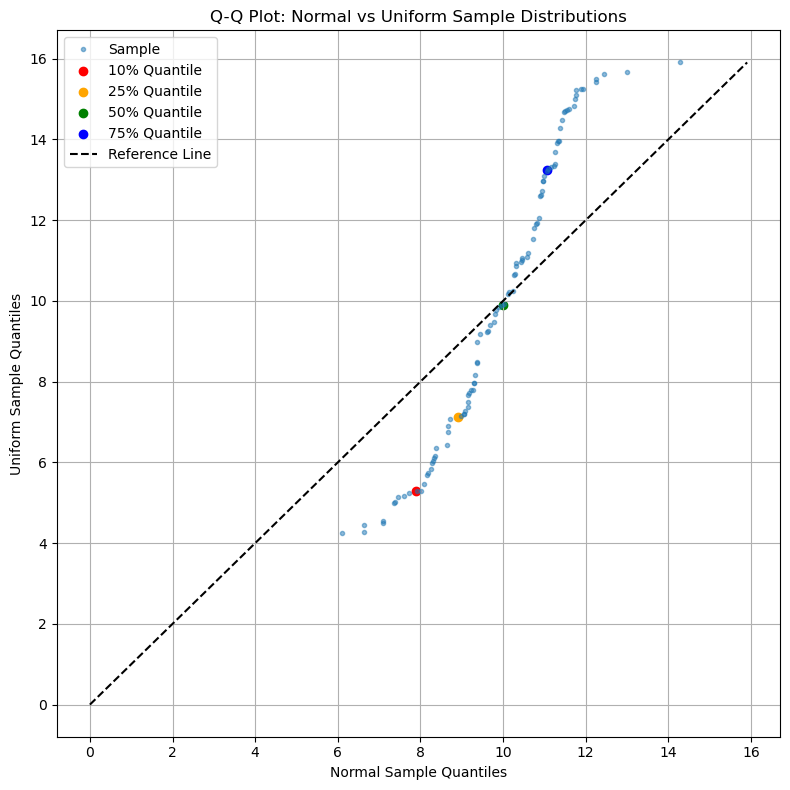

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(sorted_norm, sorted_unif, 'o', ms=3, alpha=0.5, label="Sample")
for i in range(len(quantiles)):
    plt.scatter(normal_quantiles[i], uniform_quantiles[i], c=colors[i], label=quantile_labels[i])

# Find the maximum value of both datasets
max_point = np.max([sorted_norm, sorted_unif])

# Plot the diagonal line from (0,0) to (max_value, max_value)
plt.plot(
    [0, max_point],
    [0, max_point],
    color='k',
    linestyle='--',
    label='Reference Line'
)

plt.xlabel("Normal Sample Quantiles")
plt.ylabel("Uniform Sample Quantiles")
plt.title("Q-Q Plot: Normal vs Uniform Sample Distributions")
plt.legend()
plt.tight_layout()

plt.grid(True)
plt.show()

## Analysis of Outcome

Based on the plot, it's clear that the two datasets aren't from the same type of distribution. The points form a distinct S-curve that strays significantly from the reference line. This is because the normal distribution has heavier tails and wider spread of extreme values as compared to the Uniform distribution. Essentially, the uniform data is more tightly clustered within its range, while the normal data stretches out at the ends. This also results in the lower quantiles being weighed more heavily toward the normalized data set while the upper quantiles are weighed more heavily toward the uniform sample set.

# Parallel-Coordinates Plot

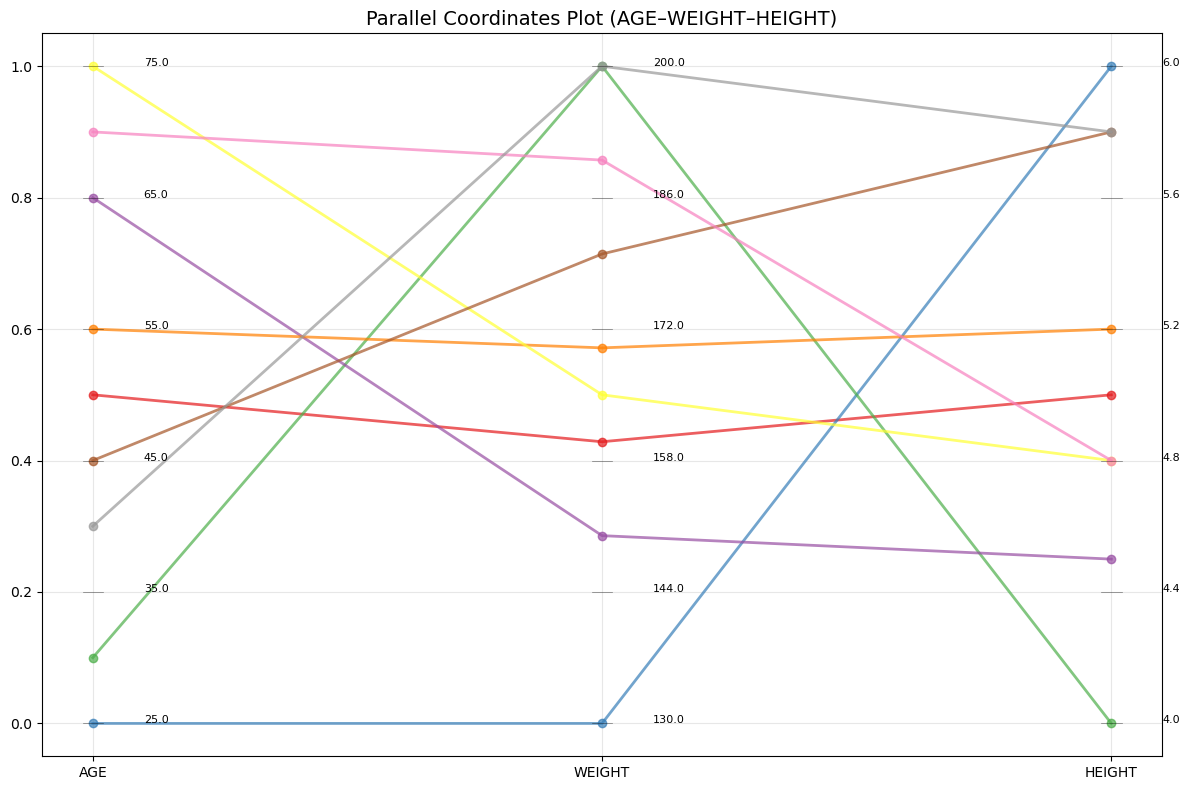

In [5]:
df = pd.DataFrame({
    "AGE":[50,25,30,65,55,75,45,70,40],
    "WEIGHT":[160,130,200,150,170,165,180,190,200],
    "HEIGHT":[5.0,6.0,4.0,4.5,5.2,4.8,5.8,4.8,5.8]
})

df['Person'] = [f'Person {i+1}' for i in range(len(df))]

# Create custom parallel coordinates plot
fig, ax = plt.subplots(figsize=(12, 8))

attributes = ['AGE', 'WEIGHT', 'HEIGHT']
n_attrs = len(attributes)

# Normalize data for plotting (scale each attribute to 0-1)
normalized_data = df[attributes].copy()
for attr in attributes:
    min_val = df[attr].min()
    max_val = df[attr].max()
    normalized_data[attr] = (df[attr] - min_val) / (max_val - min_val)

# Plot lines for each person
colors_list = plt.cm.Set1(np.linspace(0, 1, len(df)))
for i, (idx, row) in enumerate(df.iterrows()):
    values = [normalized_data.loc[idx, attr] for attr in attributes]
    ax.plot(range(n_attrs), values, 'o-', alpha=0.7, 
            color=colors_list[i], label=f'Person {i+1}', linewidth=2)

# Set up axes
ax.set_xlim(-0.1, n_attrs - 0.9)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(range(n_attrs))
ax.set_xticklabels(attributes)

# Add scaled y-axis labels for each attribute
for i, attr in enumerate(attributes):
    min_val = df[attr].min()
    max_val = df[attr].max()
    
    # Create tick positions and labels
    tick_positions = np.linspace(0, 1, 6)  # 6 ticks from min to max
    tick_labels = np.linspace(min_val, max_val, 6)
    
    # Add secondary y-axis for each attribute
    for j, (pos, label) in enumerate(zip(tick_positions, tick_labels)):
        ax.text(i + 0.1, pos, f'{label:.1f}', fontsize=8, ha='left')
        ax.plot([i-0.02, i+0.02], [pos, pos], 'k-', alpha=0.5, linewidth=0.5)

ax.set_title('Parallel Coordinates Plot (AGE–WEIGHT–HEIGHT)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analysis of Outcome

Looking at the parallel coordinates plot, we can see how each person's data connects across the axes for age, weight, and height. It's clear there's not a strong link between age and a person's weight or height, since those lines are crisscrossing all over the place. On the other hand, you can generally see a noticeable positive correlation between weight and height. The lines relatively consistently trend upward or downward between those two axes, showing that as a person's weight increases, their height might tend to increase as well. 